In [2]:
TRAINING_HISTORIES = [
    # Chatfield et al. (2014)
    'chatfield14-mel_spectrogram-lr0.0001-b32-128_per_epoch-2022-06-08 17:15:41.638800.txt',
    'chatfield14-spectrogram-lr0.0001-b16-128_per_epoch-2022-06-09 04:12:33.543335.txt',

    # Draghici et al. (2020)
    'draghici20_crnn-mel_spectrogram-lr0.0001-b32-128_per_epoch-2022-06-09 01:11:08.815456.txt',
    'draghici20_crnn-spectrogram-lr0.0001-b32-128_per_epoch-2022-06-08 22:43:01.624381.txt',

    # Shon et al. (2018)
    'shon18-mel_spectrogram-lr0.0001-b32-128_per_epoch-2022-04-02 02:00:04.968224.txt',
    'shon18-mfcc-lr0.0001-b32-128_per_epoch-2022-04-02 03:06:44.915958.txt',
    'shon18-spectrogram-lr0.0001-b32-128_per_epoch-2022-04-02 00:52:18.868991.txt',

    # Warohma et al. (2018)
    'warohma18-mel_spectrogram-lr0.0001-b32-128_per_epoch-2022-06-08 17:28:35.901000.txt',
    'warohma18-mfcc-lr0.0001-b32-128_per_epoch-2022-06-08 17:38:13.842084.txt',
    'warohma18-spectrogram-lr0.0001-b32-128_per_epoch-2022-06-08 14:59:22.113962.txt',
]

FINETUNING_HISTORIES = [
    # Chatfield et al. (2014)
    'chatfield14-mel_spectrogram-lr0.0001-b32-128_per_epoch-2022-06-09 10:59:13.473076-ft',    
    'chatfield14-spectrogram-lr0.0001-b16-128_per_epoch-2022-06-09 17:04:34.055546-ft',

    # Draghici et al. (2020)
    'draghici20_crnn-mel_spectrogram-lr0.0001-b32-128_per_epoch-2022-06-09 12:57:31.150560-ft',
    'draghici20_crnn-spectrogram-lr0.0001-b32-128_per_epoch-2022-06-09 15:49:50.757300-ft',

    # Shon et al. (2018)
    'shon18-mel_spectrogram-lr0.0001-b32-128_per_epoch-2022-05-06 17:17:03.282736-ft',
    'shon18-mfcc-lr0.0001-b32-128_per_epoch-2022-05-06 18:50:38.193062-ft',
    'shon18-spectrogram-lr0.0001-b32-128_per_epoch-2022-05-06 18:04:27.560605-ft',

    # Warohma et al. (2018)
    'warohma18-mel_spectrogram-lr0.0001-b32-128_per_epoch-2022-06-09 11:05:53.863512-ft',
    'warohma18-mfcc-lr0.0001-b32-128_per_epoch-2022-06-09 11:10:54.900513-ft',
    'warohma18-spectrogram-lr0.0001-b32-128_per_epoch-2022-06-08 15:10:23.767990-ft'
]

METADATA = [
    'chatfield14-mel_spectrogram',
    'chatfield14-spectrogram',
    'draghici20-mel_spectrogram',
    'draghici20-spectrogram',
    'shon18-mel_spectrogram',
    'shon18-mfcc',
    'shon18-spectrogram',
    'warohma18-mel_spectrogram',
    'warohma18-mfcc',
    'warohma18-spectrogram'
]

In [3]:
import pickle
import gc

from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np

for i in range(len(TRAINING_HISTORIES)):
    # Load files
    with open(f'../log/metrics/{TRAINING_HISTORIES[i]}', 'rb') as f:
        history_train = pickle.load(f)   
    with open(f'../log/metrics/{FINETUNING_HISTORIES[i]}', 'rb') as f:
        history_ft = pickle.load(f)
        
    # Print last metrics
    print(f"METADATA REPORT: {METADATA[i]}")
    print(f"\tacc: {history_ft['val_acc'][-1]}, prec: {history_ft['val_prec'][-1]}, rec: {history_ft['val_rec'][-1]}, f1: {np.mean(history_ft['val_f1'][-1])}", end='\n\n')
        
    # Data adjusting
    history_train['acc'] = np.multiply(history_train['acc'], 100)
    history_ft['acc'] = np.multiply(history_ft['acc'], 100)
    history_train['val_acc'] = np.multiply(history_train['val_acc'], 100)
    history_ft['val_acc'] = np.multiply(history_ft['val_acc'], 100)
    
    # Loss
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    ax.plot(range(len(history_train['loss'])), history_train['loss'], 'r-', label='Training loss')
    ax.plot(range(len(history_train['loss'])), history_train['val_loss'], 'g-', label='Validation loss')
    ax.plot(range(100, 100 + len(history_ft['loss'])), history_ft['loss'], 'r--', label='Fine-tuning loss')
    ax.plot(range(100, 100 + len(history_ft['loss'])), history_ft['val_loss'], 'g--', label='Fine-tuning validation loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')

    ax.grid()
    ax.legend()
    plt.savefig(f'../visualization/graph/loss-{METADATA[i]}.png')
    
    fig.clear()
    ax = fig.add_subplot(1, 1, 1)

    ax.plot(range(len(history_train['acc'])), history_train['acc'], 'r-', label='Training accuracy')
    ax.plot(range(len(history_train['acc'])), history_train['val_acc'], 'g-', label='Validation accuracy')
    ax.plot(range(100, 100 + len(history_ft['acc'])), history_ft['acc'], 'r--', label='Fine-tuning accuracy')
    ax.plot(range(100, 100 + len(history_ft['acc'])), history_ft['val_acc'], 'g--', label='Fine-tuning validation accuracy')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d%%'))

    ax.grid()
    ax.legend()
    fig.savefig(f'../visualization/graph/acc-{METADATA[i]}.png', bbox_inches='tight')
    
    fig.clear()
    plt.close(fig)
    plt.clf()
    del fig, ax
    gc.collect()

history_train.keys()

METADATA REPORT: chatfield14-mel_spectrogram
	acc: 0.8147321343421936, prec: 0.8216201066970825, rec: 0.8122209906578064, f1: 0.7819231152534485

METADATA REPORT: chatfield14-spectrogram
	acc: 0.8772321343421936, prec: 0.8838326930999756, rec: 0.8724888563156128, f1: 0.841031551361084

METADATA REPORT: draghici20-mel_spectrogram
	acc: 0.8306361436843872, prec: 0.858955442905426, rec: 0.8122209906578064, f1: 0.8126978874206543

METADATA REPORT: draghici20-spectrogram
	acc: 0.8323102593421936, prec: 0.8555199503898621, rec: 0.8194754719734192, f1: 0.7896773815155029

METADATA REPORT: shon18-mel_spectrogram
	acc: 0.8856026530265808, prec: 0.8947816491127014, rec: 0.8803013563156128, f1: 0.8785048723220825

METADATA REPORT: shon18-mfcc
	acc: 0.9757254719734192, prec: 0.977603554725647, rec: 0.9743303656578064, f1: 0.9643716216087341

METADATA REPORT: shon18-spectrogram
	acc: 0.9305245280265808, prec: 0.9390416741371155, rec: 0.9241071343421936, f1: 0.9223735928535461

METADATA REPORT: waro

dict_keys(['loss', 'acc', 'prec', 'rec', 'f1', 'val_loss', 'val_acc', 'val_prec', 'val_rec', 'val_f1'])

<Figure size 432x288 with 0 Axes>

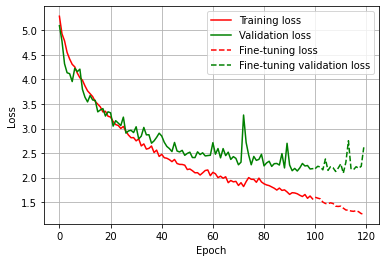

In [8]:
import gc

from matplotlib import pyplot as plt
import numpy as np

with open(f'../log/metrics/warohma18-spectrogram-lr0.0001-b32-128_per_epoch-2022-06-08 14:59:22.113962.txt', 'rb') as f:
        history_train = pickle.load(f)   
with open(f'../log/metrics/warohma18-spectrogram-lr0.0001-b32-128_per_epoch-2022-06-08 15:10:23.767990-ft', 'rb') as f:
    history_ft = pickle.load(f)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(range(len(history_train['loss'])), history_train['loss'], 'r-', label='Training loss')
ax.plot(range(len(history_train['loss'])), history_train['val_loss'], 'g-', label='Validation loss')
ax.plot(range(100, 100 + len(history_ft['loss'])), history_ft['loss'], 'r--', label='Fine-tuning loss')
ax.plot(range(100, 100 + len(history_ft['loss'])), history_ft['val_loss'], 'g--', label='Fine-tuning validation loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

ax.grid()
ax.legend()
plt.show()

# Savefig


In [9]:
history_ft['val_loss']

[2.18377423286438,
 2.2317311763763428,
 2.2174017429351807,
 2.16011381149292,
 2.3801326751708984,
 2.1483824253082275,
 2.22336745262146,
 2.200908899307251,
 2.125380754470825,
 2.1946184635162354,
 2.281202793121338,
 2.0911126136779785,
 2.3154590129852295,
 2.7516772747039795,
 2.1849241256713867,
 2.16267728805542,
 2.222428560256958,
 2.19184947013855,
 2.2321419715881348,
 2.6176109313964844]

<Figure size 432x288 with 0 Axes>

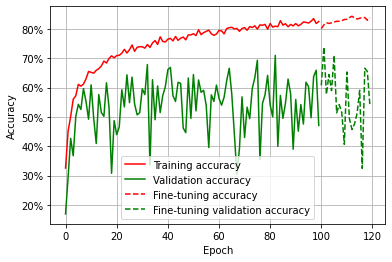

In [46]:
from matplotlib.ticker import FormatStrFormatter

fig.clear()
plt.close(fig)
plt.clf()
del fig, ax
gc.collect()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(range(len(history_train['acc'])), history_train['acc'], 'r-', label='Training accuracy')
ax.plot(range(len(history_train['acc'])), history_train['val_acc'], 'g-', label='Validation accuracy')
ax.plot(range(100, 100 + len(history_ft['acc'])), history_ft['acc'], 'r--', label='Fine-tuning accuracy')
ax.plot(range(100, 100 + len(history_ft['acc'])), history_ft['val_acc'], 'g--', label='Fine-tuning validation accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d%%'))

ax.grid()
ax.legend()
plt.show()